# About Dataset
Context
This dataset is created for prediction of Graduate Admissions from an Indian perspective.

Content
The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

1. GRE Scores ( out of 340 )
2. TOEFL Scores ( out of 120 )
3. University Rating ( out of 5 )
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA ( out of 10 )
6. Research Experience ( either 0 or 1 )
7. Chance of Admit ( ranging from 0 to 1 )


In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
s=pd.read_csv('Admission_Predict.csv')
s.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [3]:
a=s.drop('Serial No.',axis='columns')
a.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65

In [4]:
a.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
a.duplicated().sum()

0

In [6]:
for i in a.columns:
    print(f'Column name: [{i}]\n{a[i].value_counts()}\n','***'*20,'\n')

Column name: [GRE Score]
324    19
312    19
316    14
322    14
314    14
325    13
321    13
311    12
317    12
327    12
320    12
326    11
313    11
308    11
323    10
315    10
300     9
329     9
319     9
318     9
340     8
310     8
301     8
299     8
304     8
331     8
307     8
305     8
298     7
334     7
332     6
328     6
306     6
309     6
330     6
336     5
296     5
303     5
302     5
335     4
295     4
338     4
297     4
333     4
339     3
294     2
290     2
337     1
293     1
Name: GRE Score, dtype: int64
 ************************************************************ 

Column name: [TOEFL Score]
110    37
105    28
107    26
104    25
106    24
112    21
100    19
99     18
111    17
108    17
102    17
109    17
103    16
114    15
113    14
101    11
116    11
98      9
118     9
119     9
115     9
120     8
117     7
97      6
96      4
93      2
95      2
94      1
92      1
Name: TOEFL Score, dtype: int64
 *****************************************

In [7]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [8]:
a.describe()

GRE Score  TOEFL Score  University Rating         SOP        LOR   \
count  400.000000   400.000000         400.000000  400.000000  400.000000   
mean   316.807500   107.410000           3.087500    3.400000    3.452500   
std     11.473646     6.069514           1.143728    1.006869    0.898478   
min    290.000000    92.000000           1.000000    1.000000    1.000000   
25%    308.000000   103.000000           2.000000    2.500000    3.000000   
50%    317.000000   107.000000           3.000000    3.500000    3.500000   
75%    325.000000   112.000000           4.000000    4.000000    4.000000   
max    340.000000   120.000000           5.000000    5.000000    5.000000   

             CGPA    Research  Chance of Admit   
count  400.000000  400.000000        400.000000  
mean     8.598925    0.547500          0.724350  
std      0.596317    0.498362          0.142609  
min      6.800000    0.000000          0.340000  
25%      8.170000    0.000000          0.640000  
50%      8.610000    1.000000          0.730000  
75%      9.062500    1.000000          0.830000  
max      9.920000    1.000000          0.970000

## For Advance EDA and VISUALIZATION Checking  we can use Pandas Profiling

In [9]:

ProfileReport(a)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

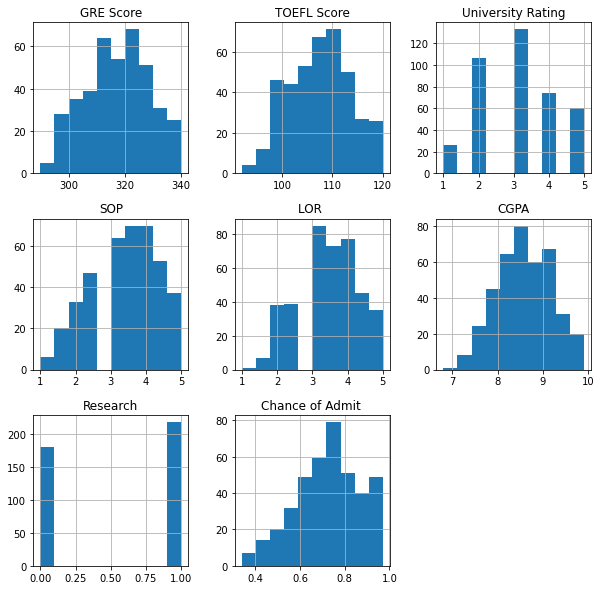

In [10]:
a.hist(figsize=(10,10))
plt.show()

In [11]:
num_list =['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ']

Q1 = a[num_list].quantile(0.25)
Q3 = a[num_list].quantile(0.75)
IQR = Q3 - Q1
print('Here we will get IQR for each column\n',IQR)

df = a[~((a[num_list] < (Q1 - 1.5 * IQR)) |(a[num_list] > (Q3 + 1.5 * IQR))).any(axis=1)]
display(df.shape)

Here we will get IQR for each column
 GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.8925
Research              1.0000
Chance of Admit       0.1900
dtype: float64


(396, 8)

In [12]:
numeric_cols = [col for col in a.columns if a[col].dtype in ['int64', 'float64']]
q1 = a[numeric_cols].quantile(0.25)
q3 = a[numeric_cols].quantile(0.75)
iqr = q3 - q1 # iqr for each numeric columns

# secleting only those rows, value is neither less nor greater than the IQR proximity rule.
data= a[~((a[numeric_cols] < (q1 - 1.5 * iqr))
                  |
                  (a[numeric_cols] > (q3 + 1.5 * iqr))).any(axis=1)]

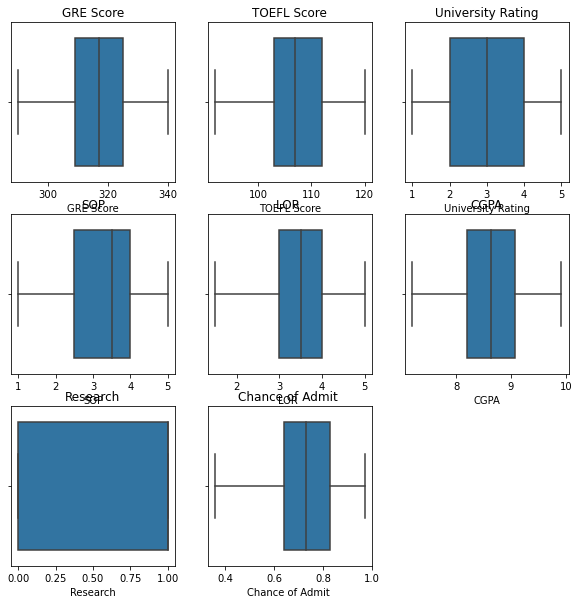

In [13]:
plt.figure(figsize=(10,10))

for i in range(len(num_list)):
    plt.subplot(3,3,i+1)
    plt.title(num_list[i])
    sns.boxplot(df[num_list[i]])

<AxesSubplot:>

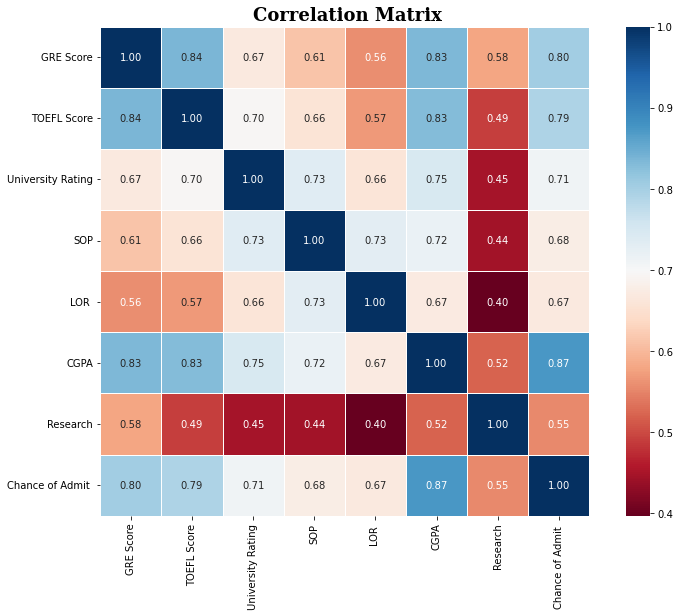

In [14]:
f, ax = plt.subplots(1, 1, figsize=(13, 9))

# mask = np.triu(np.ones_like(data.corr()))
ax.text(2.5, -0.1, 'Correlation Matrix', fontsize=18, fontweight='bold', fontfamily='serif')
sns.heatmap(a.corr(), annot=True, fmt='.2f', cmap='RdBu', square=True, linewidth=0.7, ax=ax)

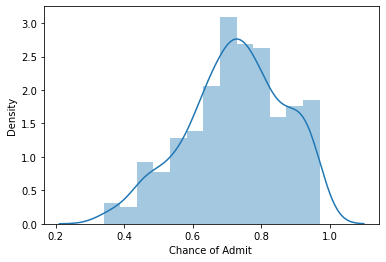

In [15]:
sns.distplot(a["Chance of Admit "])
plt.show()

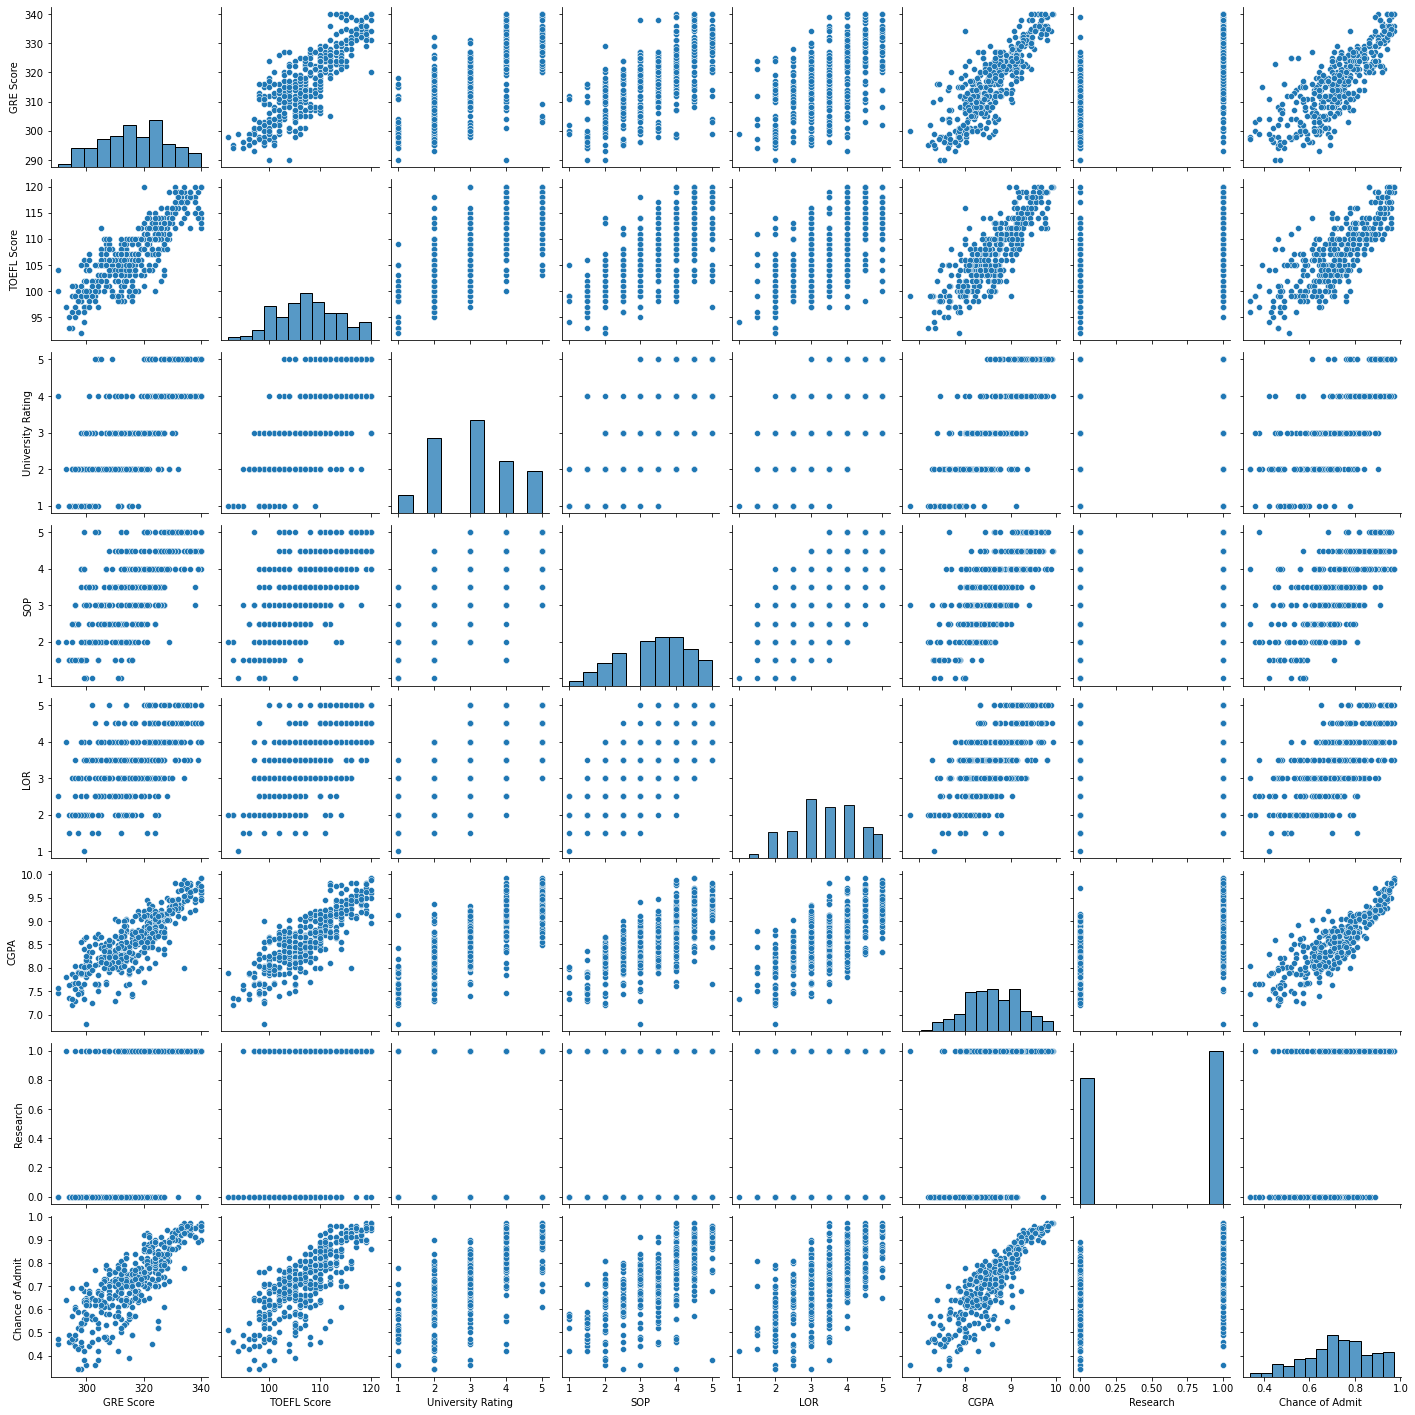

In [16]:
sns.pairplot(a)
plt.show()

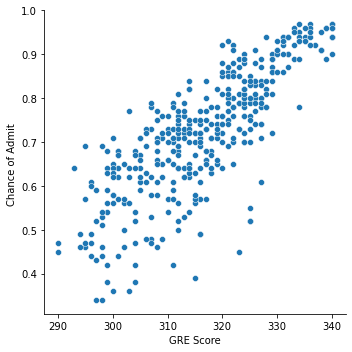

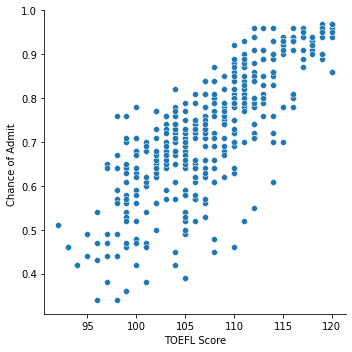

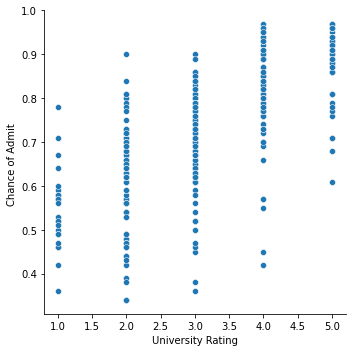

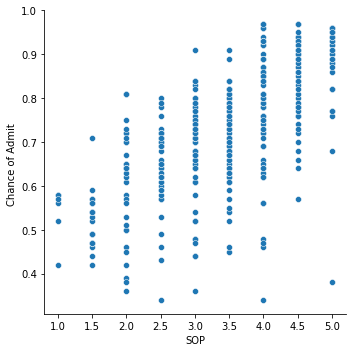

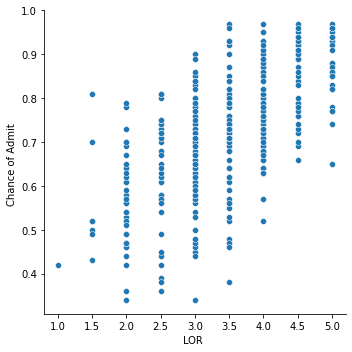

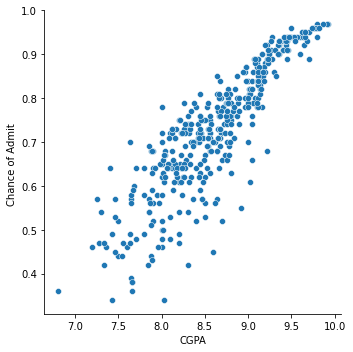

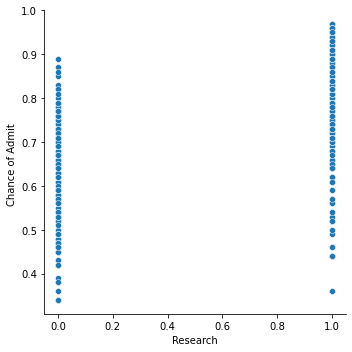

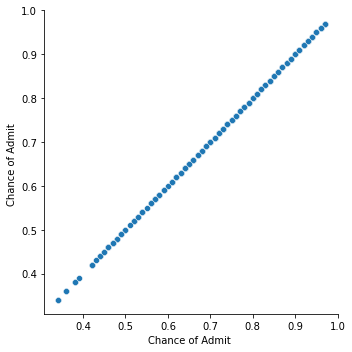

In [17]:
for i in a.columns:
    sns.relplot(x=i,y="Chance of Admit ",data=a)
plt.show()

In [18]:
a.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65

In [19]:
X=a.iloc[:,:-1]
y=a.iloc[:,-1]

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [2]:
0.78*100

78.0

In [21]:
ct = ColumnTransformer([

        ('somename', StandardScaler(), ['GRE Score','TOEFL Score'])

    ], remainder='passthrough')

In [22]:
X_train=ct.fit_transform(X_train)

In [23]:
X_train

array([[ 0.64971608, -0.37940057,  3.        , ...,  4.        ,
         8.75      ,  0.        ],
       [-0.3173032 , -0.04586161,  2.        , ...,  2.        ,
         8.5       ,  1.        ],
       [ 0.64971608, -0.04586161,  5.        , ...,  4.        ,
         8.66      ,  1.        ],
       ...,
       [-0.58103573, -0.21263109,  2.        , ...,  2.5       ,
         8.33      ,  0.        ],
       [ 0.38598355,  0.62121632,  4.        , ...,  4.        ,
         8.97      ,  1.        ],
       [-0.58103573, -0.21263109,  4.        , ...,  2.5       ,
         8.36      ,  0.        ]])

In [24]:
X_test=ct.transform(X_test)

In [25]:
X_test

array([[-0.05357067, -0.21263109,  2.        ,  2.5       ,  4.        ,
         8.32      ,  0.        ],
       [ 0.38598355,  0.28767736,  3.        ,  3.        ,  4.        ,
         8.2       ,  1.        ],
       [-0.84476827, -1.0464785 ,  3.        ,  4.        ,  3.        ,
         8.2       ,  0.        ],
       [-0.49312489, -0.04586161,  4.        ,  4.5       ,  4.5       ,
         9.        ,  1.        ],
       [ 0.47389439, -0.04586161,  3.        ,  3.5       ,  3.5       ,
         8.46      ,  1.        ],
       [-0.14148151, -1.21324798,  1.        ,  2.        ,  2.5       ,
         7.95      ,  0.        ],
       [-0.49312489, -1.54678694,  1.        ,  1.        ,  2.5       ,
         7.46      ,  0.        ],
       [ 0.03434017, -0.21263109,  3.        ,  4.        ,  3.5       ,
         8.5       ,  1.        ],
       [-1.46014417, -0.87970902,  2.        ,  1.5       ,  2.        ,
         7.87      ,  0.        ],
       [ 0.91344861,  0.9547

## Model Building(LinearRegression,Ridge,Lasso and ElasticNet Regression)

In [26]:
Lr = LinearRegression()  
# fit the model using the training data and training targets
Lr.fit(X_train, y_train) 

y_predL = Lr.predict(X_test)

In [27]:
ri = Ridge()  
# fit the model using the training data and training targets
ri.fit(X_train, y_train) 

y_predr = ri.predict(X_test)

In [28]:
la = Lasso()  
# fit the model using the training data and training targets
la.fit(X_train, y_train) 

y_predla = la.predict(X_test)

In [29]:
el = ElasticNet()  
# fit the model using the training data and training targets
el.fit(X_train, y_train) 

y_predel = el.predict(X_test)

# Summary Models 

In [30]:
results= pd.DataFrame(columns=['MAE','MSE','R2-score', 'RMSE'])
results.loc['Ridge']=[mean_absolute_error(y_test,y_predr),mean_squared_error(y_test,y_predr),r2_score(y_test,y_predr),mean_squared_error(y_test, y_predr, squared=False)]
results.loc['LinearRegression']=[mean_absolute_error(y_test,y_predL),mean_squared_error(y_test,y_predL),r2_score(y_test,y_predL),mean_squared_error(y_test, y_predL, squared=False)]
results.loc['Lasso']=[mean_absolute_error(y_test,y_predla),mean_squared_error(y_test,y_predla),r2_score(y_test,y_predla),mean_squared_error(y_test, y_predla, squared=False)]
results.loc['ElasticNet']=[mean_absolute_error(y_test,y_predel),mean_squared_error(y_test,y_predel),r2_score(y_test,y_predel),mean_squared_error(y_test, y_predel, squared=False)]


In [31]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Blues',subset=['R2-score'])

## Ridge Regression

In [32]:
ridge = Ridge()  
  
# fit the regressor with x and y data
ridge.fit(X_train, y_train)  

Ridge()

In [33]:
y_pred_ridge = ridge.predict(X_test)
score=cross_val_score(ridge,X,y,cv=10)

In [34]:
print('Mean Absolute Error is',np.round(mean_absolute_error(y_pred_ridge,y_test),4))
print('Mean Squared Error is',np.round(mean_squared_error(y_pred_ridge,y_test),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(y_pred_ridge,y_test)),4))
print('R2 Score is',np.round(r2_score(y_pred_ridge,y_test),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.0455
Mean Squared Error is 0.0045
Root Mean Squared Error is 0.0672
R2 Score is 73.87
Mean of cross validaton Score is 77.0573


### Accuracy of training and testing of Ridge Regression model

In [35]:
test_pre = ridge.predict(X_test)
test_score = r2_score(y_test,test_pre)
print("The accuracy of testing dataset ",test_score*100)
ridge.fit(X_train, y_train) 
train_pre = ridge.predict(X_train)
train_score = r2_score(y_train,train_pre)
print("The accuracy of training dataset ",score*100)

The accuracy of testing dataset  80.13458423551837
The accuracy of training dataset  [79.48228278 56.38520159 69.50945815 83.85461743 68.5655661  90.04225868
 78.94701405 90.23583471 67.40051226 86.14980255]


In [36]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_ridge,'Difference':y_test-y_pred_ridge})
pred_df

Actual Value  Predicted Value  Difference
184          0.72         0.685386    0.034614
6            0.75         0.711974    0.038026
61           0.47         0.620151   -0.150151
312          0.78         0.795690   -0.015690
100          0.71         0.726848   -0.016848
..            ...              ...         ...
123          0.61         0.658617   -0.048617
244          0.63         0.713779   -0.083779
193          0.94         0.952254   -0.012254
225          0.61         0.561890    0.048110
233          0.64         0.604655    0.035345

[80 rows x 3 columns]

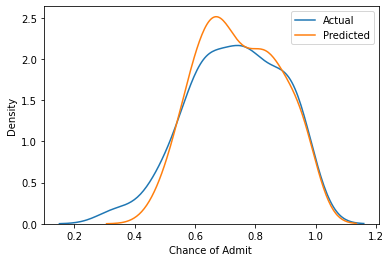

In [37]:
sns.distplot(y_test,hist=False,label='Actual')
sns.distplot(y_pred_ridge,hist=False,label='Predicted')
plt.legend()